<a href="https://colab.research.google.com/github/soichi-fujiwara/jupyter-notebook/blob/master/Train_Accidents_Pred_0904.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##乗降人数を20段階に分類

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd

df_ac = pd.read_csv("./drive/My Drive/TrainAccident/Accident_list.csv")

#鉄道会社の人身事故発生順にソート
df_line = df_ac["line"].value_counts().reset_index()

#SeriseをDataFrameに変換
col_name = ["line","count"]
df_line = pd.DataFrame(df_line)

df_line.columns = col_name
df_line.head()

,line,count
0,東武東上線,291
1,山陽本線_(JR西日本),263
2,京浜東北線,245
3,東海道線_(JR東海),244
4,中央快速線,244


In [0]:
#件数は削除
df_line = df_line.drop("count",axis=1)
df_line

#CSVに出力
df_line.to_csv("./drive/My Drive/TrainAccident/line_List_Candidate.csv", encoding = 'utf-8',index=False,header=False)

In [4]:
import itertools

kanto_line = pd.read_table('./drive/My Drive/TrainAccident/kanto_line.txt', header=None)

#dataframeをlist化
kanto_line_list = kanto_line.values.tolist()
#2次元listから1次元listへ
kanto_line_list = list(itertools.chain.from_iterable(kanto_line_list))

print(kanto_line_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


['東武東上線', '京浜東北線', '中央快速線', '常磐線', '小田急小田原線', '西武新宿線', '宇都宮線', '京王線', '京急本線', '西武池袋線', '東武伊勢崎線', '東海道線_(JR東日本)', '高崎線', '中央・総武緩行線', '東急田園都市線', '山手線', '東北本線', '近鉄大阪線', '京成本線', '横浜線', '横須賀線', '総武快速線', '南武線', '埼京線', '相鉄本線', '東武野田線', '東急東横線', '外房線', '新京成電鉄新京成線', '中央本線_(JR東日本)', '小田急江ノ島線', '武蔵野線', '総武本線', '都電荒川線', '東京メトロ東西線', '青梅線', '関東鉄道常総線', '成田線', '根岸線', '京王井の頭線', '都営地下鉄新宿線', '京葉線', '秩父鉄道秩父本線', '東急大井町線', '東京メトロ千代田線', '八高線', '東急池上線', '京王相模原線', '川越線', '東京メトロ日比谷線', '西武拝島線', '京成押上線', '相模線', '都営地下鉄浅草線', '江ノ島電鉄線', '東武スカイツリーライン', '東京メトロ半蔵門線', '東武アーバンパークライン', '都営地下鉄大江戸線', '東葉高速鉄道東葉高速線', '東京メトロ銀座線', '小田急多摩線', '横浜高速鉄道みなとみらい線', 'JR東西線', '首都圏新都市鉄道つくばエクスプレス', '京急空港線', '相鉄いずみ野線', '東京メトロ有楽町線', '東京臨海高速鉄道りんかい線', '鶴見線', '東京モノレール羽田空港線', '東武亀戸線', '京葉臨海鉄道臨海本線', '京王新線', '西武秩父線', '埼玉高速鉄道線', '横浜市営地下鉄ブルーライン']


In [5]:
#関東(首都圏)に影響を与えそうな路線のデータのみ抽出
new_data = df_ac[df_ac['line'].isin(kanto_line_list)]
new_data = new_data.reset_index()

#不要な項目を削除
new_data = new_data.drop("index",axis=1)

new_data.head(5)

,date,time,yobi,line,from_st,to_st,st
0,2019/08/10,20:08,5,八高線,拝島駅,東福生駅,拝島駅
1,2019/08/09,22:39,4,東急東横線,学芸大学駅,学芸大学駅,学芸大学駅
2,2019/08/07,18:00,2,宇都宮線,東大宮駅,蓮田駅,東大宮駅
3,2019/08/06,11:54,1,総武本線,八街駅,日向駅,八街駅
4,2019/08/05,12:18,0,東急大井町線,自由が丘駅,九品仏駅,自由が丘駅


In [6]:
#乗車人数
ninzu_df = pd.read_csv("./drive/My Drive/TrainAccident/TrainNinzu.csv")
ninzu_df['ninzu'] = ninzu_df['ninzu'].astype('float')
ninzu_df.head()


,st,ninzu
0,JR三山木駅,1899.0
1,JR五位堂駅,1567.0
2,JR俊徳道駅,8147.0
3,JR小倉駅,3752.0
4,JR河内永和駅,12844.0


In [7]:
import numpy as np
import pandas as pd
from datetime import date, timedelta
import datetime
import itertools

#祝日
holi_df = pd.read_csv("./drive/My Drive/TrainAccident/holiday.csv")
#キー結合させる為
holi_df["date"] = holi_df['date'].astype('str')

#土日
donichi_df = pd.DataFrame({"date": [pd.to_datetime("2010-01-01") + timedelta(days=i) for i in range(3650)]},dtype="object")
donichi_df = donichi_df.assign(yobi=pd.to_datetime(donichi_df['date']).apply(lambda x: x.weekday()))

donichi_df['date'] = donichi_df['date'].astype('str')
donichi_df['date'] = donichi_df['date'].str[0:10]

donichi_df = donichi_df[donichi_df['yobi'] >= 5]
donichi_df['date'] = donichi_df['date'].str.replace('-', '/')
donichi_list = donichi_df['date'].tolist()

donichi_df.to_csv("./drive/My Drive/TrainAccident/donichi.csv")

print(holi_df.head())

         date  holiday_flg
0  2010/01/01            1
1  2010/01/11            1
2  2010/02/11            1
3  2010/03/21            1
4  2010/03/22            1


In [8]:
import datetime
from datetime import date, timedelta

new_df = new_data.copy()

#-------------------------------------------------------------------------------------------
#時間帯
#-------------------------------------------------------------------------------------------
new_df = new_df.assign(time_category=new_df['time'])

new_df.loc[(new_df['time_category'].str[0:2].isin(["04","05"])) ,"time_category"] = "morning_time"
new_df.loc[(new_df['time_category'].str[0:2].isin(["06","07","08","09"])) ,"time_category"] = "comp_time"
new_df.loc[(new_df['time_category'].str[0:2].isin(["17","18","19","20"])) ,"time_category"] = "home_time"
new_df.loc[(new_df['time_category'].str[0:2].isin(["21","22","23"])) ,"time_category"] = "night_time"
new_df.loc[(new_df['time_category'].str[0:2].isin(["00","01","02","03"])) ,"time_category"] = "midnight_time"
new_df.loc[(new_df['time_category'].str[0:2].isin(["10","11","12"])) ,"time_category"] = "day_am_time"
new_df.loc[(new_df['time_category'].str[0:2].isin(["13","14","15","16"])) ,"time_category"] = "day_pm_time"

dmy_df = pd.get_dummies(new_df['time_category'])
add_df = pd.merge(new_df, dmy_df, left_index=True, right_index=True)
add_df = add_df.drop(["time","time_category"],axis=1)

#-------------------------------------------------------------------------------------------
#曜日
#-------------------------------------------------------------------------------------------
dmy_df = pd.get_dummies(add_df['yobi'],prefix='yobi')
add_df = pd.merge(add_df, dmy_df, left_index=True, right_index=True)
add_df = add_df.drop("yobi",axis=1)

#-------------------------------------------------------------------------------------------
#祝日
#-------------------------------------------------------------------------------------------
add_df = pd.merge(add_df,holi_df, on='date' , how='left')#left join
Special_holiday_list = ["08/13","08/14","08/15","08/16","12/29","12/30","12/31","01/02","01/03","01/04"]

#土日も休日扱いに
add_df.loc[(add_df['date'].str[5:10].isin(donichi_list)) ,"holiday_flg"] = 1
add_df.loc[(add_df['date'].str[5:10].isin(Special_holiday_list)) ,"holiday_flg"] = 1
add_df.loc[(add_df['holiday_flg'].isnull()) ,"holiday_flg"] = 0

#-------------------------------------------------------------------------------------------
#休み明け
#-------------------------------------------------------------------------------------------
#祝日
holi_df2 = holi_df.drop(["holiday_flg"],axis=1)
#土日
donichi_df2 = donichi_df.drop(["yobi"],axis=1)

year_list = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]
Special_holiday_list = ["08/13","08/14","08/15","08/16","12/29","12/30","12/31","01/02","01/03","01/04"]

holi_all_list = []

for yl in year_list:
  for sl in Special_holiday_list:
    wk = str(yl) + "/" + str(sl)
    holi_all_list.append(wk)

special_holi_df = pd.DataFrame(holi_all_list,columns=["date"])

#全休日
holi_all_df = pd.concat([holi_df,donichi_df,special_holi_df],axis=0)
holi_all_df = holi_all_df[~holi_all_df.duplicated(["date"])].sort_values('date', ascending=True).reset_index(drop=True)

holi_all_list = holi_all_df["date"].values.tolist()
renkyu_ake_list = []

for index,udl in enumerate(holi_all_list):
  #最大11連休まで考慮
  for i in [1,2,3,4,5,6,7,8,9,10,11]:
    chk_date = pd.to_datetime(udl) + timedelta(days=i)
    chk_date = str(chk_date)[0:10].replace('-', '/')
    
    if (index+i) == len(holi_all_list):
      break
    else:
      #次の日付[inidex+1]がlistに無い場合=平日と見なす
      if chk_date != holi_all_list[index+i]:
        renkyu_ake_list.append(chk_date)
        renkyu_cnt = 0
        break

renkyu_ake_list = set(renkyu_ake_list)
renkyu_ake_df = pd.DataFrame(renkyu_ake_list,columns=["date"]).sort_values('date', ascending=True).reset_index(drop=True)
renkyu_ake_df = renkyu_ake_df.assign(holi_ake_flg=1)

#CSV化
renkyu_ake_df.to_csv("./drive/My Drive/TrainAccident/renkyu_ake.csv",index=False)

add_df = pd.merge(add_df,renkyu_ake_df, on='date' , how='left')#left join
add_df.loc[(add_df['holi_ake_flg'].isnull()) ,"holi_ake_flg"] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [0]:
#キー結合させる為
add_df["date"] = add_df['date'].astype('str')

#乗車人数
base_df = pd.merge(add_df,ninzu_df, on='st' , how='left')#left join

#乗車人数を正規化
base_df['ninzu'] = base_df['ninzu'].astype('float')
base_df = base_df[base_df['ninzu'] > 0]

s = base_df['ninzu']
base_df['ninzu'] = (s - s.min()) / (s.max() - s.min())

#人数をカテゴライズ化(20分割)
ninzu_num_df = pd.DataFrame(pd.qcut(base_df['ninzu'], 20,
                                         labels=[0,0.05,0.1,0.15,0.2,
                                                 0.25,0.3,0.35,0.4,0.45,
                                                 0.5,0.55,0.6,0.65,0.7,
                                                 0.75,0.8,0.85,0.9,0.95]))
ninzu_num_df = ninzu_num_df.rename(columns={'ninzu': 'ninzu_cate'})

base_df = pd.concat([base_df,ninzu_num_df],axis=1)
base_df["ninzu"] = base_df["ninzu_cate"]


In [10]:
base_df3 = base_df.drop(["line","from_st","to_st","st","ninzu_cate"],axis=1)
base_df3 = base_df3.assign(flg=1)
base_df3.head(10)

,date,comp_time,day_am_time,day_pm_time,home_time,midnight_time,morning_time,night_time,yobi_0,yobi_1,yobi_2,yobi_3,yobi_4,yobi_5,yobi_6,holiday_flg,holi_ake_flg,ninzu,flg
0,2019/08/10,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.65,1
1,2019/08/09,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0.0,0.65,1
2,2019/08/07,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.60,1
3,2019/08/06,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.15,1
4,2019/08/05,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.0,1.0,0.75,1
6,2019/08/03,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.0,0.0,0.30,1
7,2019/08/03,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.15,1
8,2019/08/03,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,0.0,0.35,1
9,2019/08/03,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,0.0,0.50,1
10,2019/08/01,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.70,1


##▲base_df作成　ここまで
##▼make_df作成　ここから

In [0]:
import numpy as np
from datetime import date, timedelta
import itertools

#日付データ作成
dates_df = pd.DataFrame({"date": [pd.to_datetime("2010-01-01") + timedelta(days=i) for i in range(3650)]},dtype="object")
date_list = dates_df.values.tolist()

#デフォルトでは小数点が付いてしまう為、int型に変換
time_cate = np.eye(7).astype(int)
yobi_cate = np.eye(7).astype(int)
#holiday関連(休日flg,休日明けflg)

ninzu_list=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,
            0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]

wk_list = []
for wk in date_list:
  for wk2 in time_cate:
    for wk3 in yobi_cate:
      #人数(正規化済)分 繰り返し
      for nlist in ninzu_list:
        list_parts = np.concatenate((wk,wk2,wk3,0,0,nlist,0), axis=None)
        wk_list.append(list_parts.tolist())

col=["date",
     "comp_time","day_am_time","day_pm_time","home_time","midnight_time","morning_time","night_time",
     "yobi_0","yobi_1","yobi_2","yobi_3","yobi_4","yobi_5","yobi_6",
     "holiday_flg","holi_ake_flg",
     "ninzu",
     "flg"]

make_df = pd.DataFrame(data=wk_list,columns=col)

make_df['date'] = make_df['date'].astype('str')
make_df['date'] = make_df['date'].str.replace('-', '/')

#祝日
holi_list = holi_df["date"].values.tolist()
make_df.loc[(make_df["date"].isin(holi_list)),"holiday_flg"] = 1

#土日
make_df.loc[(make_df['date'].str[5:10].isin(donichi_list)) ,"holiday_flg"] = 1

#特殊休日
Special_holiday_list = ["08/13","08/14","08/15","08/16","12/29","12/30","12/31","01/02","01/03","01/04"]
make_df.loc[(make_df['date'].str[5:10].isin(Special_holiday_list)) ,"holiday_flg"] = 1

#平日はALLゼロ
make_df.loc[(make_df['holiday_flg'].isnull()) ,"holiday_flg"] = 0

#休日明け
ake_list = renkyu_ake_df["date"].values.tolist()
make_df.loc[(make_df["date"].isin(ake_list)),"holi_ake_flg"] = 1
make_df.loc[(make_df['holi_ake_flg'].isnull()) ,"holi_ake_flg"] = 0

make_df.head(3)

,date,comp_time,day_am_time,day_pm_time,home_time,midnight_time,morning_time,night_time,yobi_0,yobi_1,yobi_2,yobi_3,yobi_4,yobi_5,yobi_6,holiday_flg,holi_ake_flg,ninzu,flg
0,2010/01/01,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.00,0
1,2010/01/01,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.05,0
2,2010/01/01,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.10,0


##★データセットインポート(make_df)



In [11]:
#make_df.to_csv("./drive/My Drive/TrainAccident/make_df.csv")
make_df = pd.read_csv("./drive/My Drive/TrainAccident/make_df.csv",index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [12]:
print(base_df3.columns)
print(make_df.columns)

Index(['date', 'comp_time', 'day_am_time', 'day_pm_time', 'home_time',
       'midnight_time', 'morning_time', 'night_time', 'yobi_0', 'yobi_1',
       'yobi_2', 'yobi_3', 'yobi_4', 'yobi_5', 'yobi_6', 'holiday_flg',
       'holi_ake_flg', 'ninzu', 'flg'],
      dtype='object')
Index(['date', 'comp_time', 'day_am_time', 'day_pm_time', 'home_time',
       'midnight_time', 'morning_time', 'night_time', 'yobi_0', 'yobi_1',
       'yobi_2', 'yobi_3', 'yobi_4', 'yobi_5', 'yobi_6', 'holiday_flg',
       'holi_ake_flg', 'ninzu', 'flg'],
      dtype='object')


In [13]:
ret = pd.concat([base_df3, make_df], axis=0)

#duplicated()と論理否定演算子~を使って、重複した行を削除したDataFrameを取得できる。
ret = ret[~ret.duplicated(["date",
                           "comp_time","day_am_time","day_pm_time","home_time","midnight_time","morning_time","night_time",
                           "yobi_0","yobi_1","yobi_2","yobi_3","yobi_4","yobi_5","yobi_6",
                           "holiday_flg","holi_ake_flg",
                           "ninzu"])]

#余分なデータは削除
ret = ret[ret["date"] <= "2019/08/10"]
print(ret.shape)

(3438820, 19)


In [14]:
#補完したい期間の日付を入れたデータフレームを作ってマージ
#https://qiita.com/hanon/items/29cf5ed9acb4f731538f

#キー結合させる為
ret["date"] = ret['date'].astype('str')

#気温
temp_df = pd.read_csv("./drive/My Drive/TrainAccident/temp.csv")
temp_df = temp_df.dropna(subset=["max_temp"])
temp_df = temp_df.dropna(subset=["min_temp"])

ret2 = pd.merge(ret,temp_df, on='date' , how='left')#left join

#日照時間
sun_df = pd.read_csv("./drive/My Drive/TrainAccident/suntime.csv")
sun_df = sun_df.dropna(subset=["suntime"])

ret3 = pd.merge(ret2,sun_df, on='date' , how='left')#left join

#降水量/気圧
rain_pres_df = pd.read_csv("./drive/My Drive/TrainAccident/rain_pres.csv")
rain_pres_df = rain_pres_df.drop('dmy',axis=1)

rain_pres_df['rain'] = rain_pres_df['rain'].astype('float')
rain_pres_df['pres'] = rain_pres_df['pres'].astype('float')

ret3 = pd.merge(ret3,rain_pres_df, on='date' , how='left')#left join

print(ret3.head(3))
print(ret3.shape)

         date  comp_time  day_am_time  ...  suntime  rain    pres
0  2019/08/10          0            0  ...      9.4   0.0  1005.4
1  2019/08/09          0            0  ...     10.8   0.0  1005.5
2  2019/08/07          0            0  ...      9.5   0.0  1007.4

[3 rows x 24 columns]
(3438820, 24)


##季節ごとの平均気温を算出

In [0]:
#日付単位で最高気温を集計
#()･･･集計単位項目
#[]･･･集計対象項目
import numpy as np

#listからnumpy.darray型にしないとnumpyの集計関数が使用できない
temp_mean_ary = []
month_list = ["01","02","03","04","05","06","07","08","09","10","11","12"]

for m_val in month_list:
  max_temp = np.array(temp_df[temp_df.date.str[5:7] == m_val]["max_temp"]).mean()
  min_temp = np.array(temp_df[temp_df.date.str[5:7] == m_val]["min_temp"]).mean()

  list_parts = np.concatenate((m_val,max_temp,min_temp), axis=None)
  temp_mean_ary.append(list_parts.tolist())

col=["date","max_temp","min_temp"]
temp_mean_df = pd.DataFrame(data=temp_mean_ary,columns=col)

##季節ごとの日照時間を算出

In [0]:
#日付単位で日照時間を集計
#()･･･集計単位項目
#[]･･･集計対象項目
import numpy as np

#欠損値削除
sun_df = sun_df.dropna()

#listからnumpy.darray型にしないとnumpyの集計関数が使用できない
sun_mean_ary = []
month_list = ["01","02","03","04","05","06","07","08","09","10","11","12"]

for m_val in month_list:
  sun_mean = np.array(sun_df[sun_df.date.str[5:7] == m_val]["suntime"]).mean()

  list_parts = np.concatenate((m_val,sun_mean), axis=None)
  sun_mean_ary.append(list_parts.tolist())

col=["date","suntime"]
sun_mean_df = pd.DataFrame(data=sun_mean_ary,columns=col)

##欠測値を補完

In [17]:
#欠測日を確認
#(set:listの重複を削除)
max_temp_chk = set(ret3[ret3["max_temp"].isnull()]["date"].values)
print("最高気温:",max_temp_chk)

min_temp_chk = set(ret3[ret3["min_temp"].isnull()]["date"].values)
print("最低気温:",min_temp_chk)

sun_chk = set(ret3[ret3["suntime"].isnull()]["date"].values)
print("日照時間:",sun_chk)

rain_chk = set(ret3[ret3["rain"].isnull()]["date"].values)
print("降水量:",rain_chk)

pres_chk = set(ret3[ret3["pres"].isnull()]["date"].values)
print("気圧:",pres_chk)

最高気温: {'2012/04/04'}
最低気温: {'2012/04/04'}
日照時間: {'2012/07/23', '2013/05/21', '2017/07/11', '2014/12/05', '2012/11/08', '2013/05/19', '2017/07/17', '2012/11/09', '2014/02/20', '2010/02/18'}
降水量: set()
気圧: set()


In [0]:
#最高気温
# ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["01"])),"max_temp"] = temp_mean_df.loc[0,"max_temp"]
# ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["02"])),"max_temp"] = temp_mean_df.loc[1,"max_temp"]
# ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["03"])),"max_temp"] = temp_mean_df.loc[2,"max_temp"]
ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["04"])),"max_temp"] = temp_mean_df.loc[3,"max_temp"]
# ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["05"])),"max_temp"] = temp_mean_df.loc[4,"max_temp"]
# ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["06"])),"max_temp"] = temp_mean_df.loc[5,"max_temp"]
# ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["07"])),"max_temp"] = temp_mean_df.loc[6,"max_temp"]
# ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["08"])),"max_temp"] = temp_mean_df.loc[7,"max_temp"]
# ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["09"])),"max_temp"] = temp_mean_df.loc[8,"max_temp"]
# ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["10"])),"max_temp"] = temp_mean_df.loc[9,"max_temp"]
# ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["11"])),"max_temp"] = temp_mean_df.loc[10,"max_temp"]
# ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["12"])),"max_temp"] = temp_mean_df.loc[11,"max_temp"]

#最低気温
# ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["01"])),"min_temp"] = temp_mean_df.loc[0,"min_temp"]
# ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["02"])),"min_temp"] = temp_mean_df.loc[1,"min_temp"]
# ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["03"])),"min_temp"] = temp_mean_df.loc[2,"min_temp"]
ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["04"])),"min_temp"] = temp_mean_df.loc[3,"min_temp"]
# ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["05"])),"min_temp"] = temp_mean_df.loc[4,"min_temp"]
# ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["06"])),"min_temp"] = temp_mean_df.loc[5,"min_temp"]
# ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["07"])),"min_temp"] = temp_mean_df.loc[6,"min_temp"]
# ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["08"])),"min_temp"] = temp_mean_df.loc[7,"min_temp"]
# ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["09"])),"min_temp"] = temp_mean_df.loc[8,"min_temp"]
# ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["10"])),"min_temp"] = temp_mean_df.loc[9,"min_temp"]
# ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["11"])),"min_temp"] = temp_mean_df.loc[10,"min_temp"]
# ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["12"])),"min_temp"] = temp_mean_df.loc[11,"min_temp"]

#日照時間
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["01"])),"suntime"] = sun_mean_df.loc[0,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["02"])),"suntime"] = sun_mean_df.loc[1,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["03"])),"suntime"] = sun_mean_df.loc[2,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["04"])),"suntime"] = sun_mean_df.loc[3,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["05"])),"suntime"] = sun_mean_df.loc[4,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["06"])),"suntime"] = sun_mean_df.loc[5,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["07"])),"suntime"] = sun_mean_df.loc[6,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["08"])),"suntime"] = sun_mean_df.loc[7,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["09"])),"suntime"] = sun_mean_df.loc[8,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["10"])),"suntime"] = sun_mean_df.loc[9,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["11"])),"suntime"] = sun_mean_df.loc[10,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["12"])),"suntime"] = sun_mean_df.loc[11,"suntime"]

In [19]:
#予測に不要な項目を削除
ret4 = ret3.copy().drop(["date"], axis=1)

#カラム「max_temp」「min_temp」を元に「diff_temp」を作成
ret5 = ret4.assign(diff_temp=ret4['max_temp'].astype(float)-ret4['min_temp'].astype(float))

print(ret5.head())
print(ret5.shape)

   comp_time  day_am_time  day_pm_time  ...  rain    pres  diff_temp
0          0            0            0  ...   0.0  1005.4        7.7
1          0            0            0  ...   0.0  1005.5        6.4
2          0            0            0  ...   0.0  1007.4        6.0
3          0            1            0  ...   0.0  1008.4        5.6
4          0            1            0  ...   0.0  1009.5        7.7

[5 rows x 24 columns]
(3438820, 24)


In [20]:
#型変換
ret5['max_temp'] = ret5['max_temp'].astype('float')
ret5['min_temp'] = ret5['min_temp'].astype('float')
ret5['diff_temp'] = ret5['diff_temp'].astype('float')
ret5['suntime'] = ret5['suntime'].astype('float')
ret5['rain'] = ret5['rain'].astype('float')
ret5['pres'] = ret5['pres'].astype('float')

#正規化
ret_ = ret5.copy()

s = ret_['max_temp']
ret_['max_temp'] = (s - s.min()) / (s.max() - s.min())

s = ret_['min_temp']
ret_['min_temp'] = (s - s.min()) / (s.max() - s.min())

s = ret_['suntime']
ret_['suntime'] = (s - s.min()) / (s.max() - s.min())

s = ret_['rain']
ret_['rain'] = (s - s.min()) / (s.max() - s.min())

s = ret_['pres']
ret_['pres'] = (s - s.min()) / (s.max() - s.min())

s = ret_['diff_temp']
ret_['diff_temp'] = (s - s.min()) / (s.max() - s.min())

ret = ret_.copy()
print(ret.head())
print(ret.shape)

   comp_time  day_am_time  day_pm_time  ...  rain      pres  diff_temp
0          0            0            0  ...   0.0  0.519626   0.358696
1          0            0            0  ...   0.0  0.521495   0.288043
2          0            0            0  ...   0.0  0.557009   0.266304
3          0            1            0  ...   0.0  0.575701   0.244565
4          0            1            0  ...   0.0  0.596262   0.358696

[5 rows x 24 columns]
(3438820, 24)


In [21]:
#不均衡データであることを確認する。
print(ret["flg"].value_counts())

0    3433817
1       5003
Name: flg, dtype: int64


In [22]:
#ダウンサンプリング
!pip install imbalanced-learn

from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_predict

# ラベルと入力データに分離する
y = ret.loc[:,"flg"]
y = y.values.tolist()

x = ret.loc[:,[
               "comp_time","day_am_time","day_pm_time","home_time","midnight_time","morning_time","night_time",
               "yobi_0","yobi_1","yobi_2","yobi_3","yobi_4","yobi_5","yobi_6",
               "holiday_flg","holi_ake_flg",
               "ninzu","max_temp","min_temp","suntime","rain","pres","diff_temp"]]

#ダウンサンプリング
sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(x, y)
print(X_resampled.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


(10006, 23)


In [23]:
#再データフレーム化
X_resampled2 = pd.DataFrame(X_resampled,columns=[
                                                 "comp_time","day_am_time","day_pm_time","home_time","midnight_time","morning_time","night_time",
                                                 "yobi_0","yobi_1","yobi_2","yobi_3","yobi_4","yobi_5","yobi_6",
                                                 "holiday_flg","holi_ake_flg",
                                                 "ninzu","max_temp","min_temp","suntime","rain","pres","diff_temp"])
y_resampled2 = pd.DataFrame(y_resampled,columns=["flg"])

#結合
resmp_df = pd.concat([X_resampled2, y_resampled2],axis=1).reset_index(drop=True)

resmp_df.to_csv("./drive/My Drive/TrainAccident/AccidentResample.csv",index=False)

#均衡データになったことを確認する。
print(resmp_df["flg"].value_counts())

1    5003
0    5003
Name: flg, dtype: int64


##検証1(Classifier)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# ラベルと入力データに分離する
y = resmp_df.loc[:,"flg"]
y = y.values.tolist()
x = resmp_df.drop(["flg"],axis=1)

# 学習用とテスト用に分離する
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, shuffle = True)

# 学習する
model = GradientBoostingClassifier ()
model.fit(x_train, y_train)

# 評価する
y_pred = model.predict(x_test)
print("正解率 = " , accuracy_score(y_test, y_pred))


#参考：日本の天気予報は正解率87%

正解率 =  0.6333666333666333


In [25]:
#説明変数の影響度合
#Classifierの場合
importances = model.feature_importances_
df_ft_name_df = pd.DataFrame(x.columns.tolist(),columns=["name"])
df_ft_val_df = pd.DataFrame(importances.tolist(),columns=["val"])

imp_df = pd.concat([df_ft_name_df,df_ft_val_df],axis=1).sort_values('val', ascending=False).reset_index(drop=True)
imp_df.head(10)

,name,val
0,yobi_0,0.312327
1,morning_time,0.144694
2,midnight_time,0.132499
3,holi_ake_flg,0.112030
4,pres,0.047671
5,max_temp,0.039112
6,min_temp,0.035374
7,suntime,0.031130
8,diff_temp,0.029137
9,ninzu,0.028723


In [26]:
#真陽性率 (Recall)
#Positive なデータに対してモデルがどれだけ正解できているかを確認
from sklearn.metrics import recall_score
print("真陽性率 = ",recall_score(y_test, y_pred))

真陽性率 =  0.7869022869022869


In [27]:
#適合率 (Precision) 
#モデルが Positive と判断したデータの中に、どれだけ本当に Positive なものがあったかを確認
from sklearn.metrics import precision_score
print("適合率 = ",precision_score(y_test, y_pred))

適合率 =  0.588646967340591


In [28]:
#他のアルゴリズムの場合の予測
import warnings
from sklearn.utils.testing import all_estimators
from sklearn.metrics import accuracy_score

# classifierのアルゴリズム全てを取得する --- (*1)
warnings.filterwarnings('ignore')
allAlgorithms = all_estimators(type_filter="classifier")

for(name, algorithm) in allAlgorithms:

    #エラー回避
    if name == 'GradientBoostingClassifier' or name == 'RandomForestClassifier' or name == 'KNeighborsClassifier' or name == 'LogisticRegression' or name == 'LogisticRegressionCV':

      # 各アリゴリズムのオブジェクトを作成 --- (*2)
      # 注意:一部のアルゴリズムは引数に何かを渡さないとエラーになる。
      clf = algorithm()

      # 学習して、評価する --- (*3)
      #( x_train : 学習用データ / learn_label : ラベル)
      clf.fit(x_train, y_train)
      y_pred = clf.predict(x_test)
      print(name,"の正解率 = " , accuracy_score(y_test, y_pred))

GradientBoostingClassifier の正解率 =  0.6333666333666333
KNeighborsClassifier の正解率 =  0.6283716283716284
LogisticRegression の正解率 =  0.6003996003996004
LogisticRegressionCV の正解率 =  0.6013986013986014
RandomForestClassifier の正解率 =  0.6288711288711288


##ROC曲線

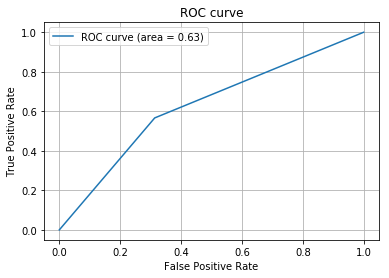

In [29]:
#AUC(Area Under Curve)=ROC 曲線下の面積
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# FPR,TPR(しきい値)を算出
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

# AUC
auc = metrics.auc(fpr, tpr)

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
#判例
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#目盛り
plt.grid(True)


##検証2(スタッキング)

In [0]:
!pip install mlxtend

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

extra = ExtraTreesClassifier()
log = LogisticRegression()
knn = KNeighborsClassifier()

rf = RandomForestClassifier()

In [0]:
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score

# ラベルと入力データに分離する
y = resmp_df.loc[:,"flg"]
y = y.values.tolist()
x = resmp_df.drop(["flg"],axis=1)

# 学習用とテスト用に分離する
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, shuffle = True)

sclf = StackingClassifier(classifiers=[extra, log, knn], meta_classifier= rf)

classifiersList = [extra, log, knn, sclf]
labelsList = ['Extra Trees', 'Logistic', 'KNN', 'StackingClassifier']

for clf, label in zip(classifiersList, labelsList):
    scores = cross_val_score(clf, x, y, cv=10, scoring='accuracy')
    print("Accuracy: {} [{}]".format(scores.mean(),label))

Accuracy: 0.6059355289421158 [Extra Trees]
Accuracy: 0.594343512974052 [Logistic]
Accuracy: 0.6228229540918163 [KNN]
Accuracy: 0.5986363273453094 [StackingClassifier]


In [0]:
sclf.fit(x_train, y_train)
y_pred = sclf.predict(x_test)
print("正解率 = " , accuracy_score(y_test, y_pred))
print("真陽性率 = ",recall_score(y_test, y_pred))
print("適合率 = ",precision_score(y_test, y_pred))

正解率 =  0.6328671328671329
真陽性率 =  0.5966796875
適合率 =  0.654876741693462


In [0]:
# pickleでモデルを保存
import pickle

filename = './drive/My Drive/TrainAccident/Accident_model_0903.sav'
pickle.dump(model, open(filename, 'wb'))